In [58]:

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import pandas as pd

In [39]:
train_path = '/home/filnow/Desktop/data/train/'
test_path = '/home/filnow/Desktop/data/test/'

In [50]:
filenames = os.listdir(train_path)

labels = []

for fname in filenames:
    labels.append(str(fname)[:3])
    img_shape = mpimg.imread(train_path+fname).shape

train_df = pd.DataFrame({'filename': filenames, 'label': labels})
train_df.head()

,filename,label
0,dog.3199.jpg,dog
1,cat.7772.jpg,cat
2,dog.7242.jpg,dog
3,cat.6910.jpg,cat
4,dog.6055.jpg,dog


In [41]:
train_set_df, dev_set_df = train_test_split(train_df[['filename', 'label']], test_size=0.3, random_state = 42, shuffle=True, stratify=train_df['label'])
print(train_set_df.shape, dev_set_df.shape)

(17500, 2) (7500, 2)


In [43]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen  = ImageDataGenerator(rescale = 1.0/255)

In [48]:
train_generator = train_datagen.flow_from_dataframe(
    train_set_df, 
    directory=train_path, 
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    validate_filenames=False 
)

validation_generator = validation_datagen.flow_from_dataframe(
    dev_set_df, 
    directory=train_path, 
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    validate_filenames=False 
)

Found 17500 non-validated image filenames belonging to 2 classes.
Found 7500 non-validated image filenames belonging to 2 classes.


In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)     

In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [49]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_steps=50
                   )

Epoch 1/10
100/100 [==============================] - 69s 690ms/step - loss: 0.6895 - accuracy: 0.5459 - val_loss: 0.6683 - val_accuracy: 0.6125
Epoch 2/10
100/100 [==============================] - 63s 626ms/step - loss: 0.6654 - accuracy: 0.5964 - val_loss: 0.6323 - val_accuracy: 0.6606
Epoch 3/10
100/100 [==============================] - 80s 805ms/step - loss: 0.6435 - accuracy: 0.6289 - val_loss: 0.6583 - val_accuracy: 0.6050
Epoch 4/10
100/100 [==============================] - 62s 616ms/step - loss: 0.6172 - accuracy: 0.6555 - val_loss: 0.5922 - val_accuracy: 0.6812
Epoch 5/10
100/100 [==============================] - 85s 847ms/step - loss: 0.5998 - accuracy: 0.6753 - val_loss: 0.5488 - val_accuracy: 0.7050
Epoch 6/10
100/100 [==============================] - 58s 582ms/step - loss: 0.5866 - accuracy: 0.6893 - val_loss: 0.6024 - val_accuracy: 0.6744
Epoch 7/10
100/100 [==============================] - 79s 785ms/step - loss: 0.5807 - accuracy: 0.6941 - val_loss: 0.5679 - val_ac

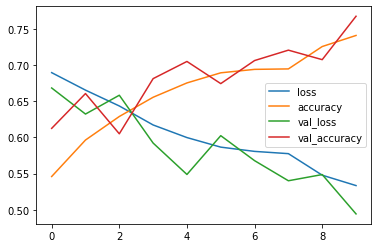

In [51]:
pd.DataFrame(history.history).plot();

1/1 [==============================] - 0s 25ms/step
Prediction: cat


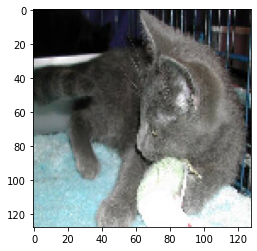

In [59]:
img = load_img(test_path + '100.jpg', target_size=(128, 128))

test_img = np.expand_dims(img, axis=0) # batch dimension

result = model.predict(test_img)
prediction = 'dog' if result[0][0] > 0.5 else 'cat'

plt.imshow(img)
print(f"Prediction: {prediction}")